Importe de las librerias necesarias

In [4]:
import numpy as np
import pandas as pd 
from datetime import datetime, time 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import calendar
import warnings
from scipy import stats

Se abre el archivo definitivo que se limpio en el etl

In [5]:
df_siniestros=pd.read_csv('victimas_fatales.csv')

In [27]:
df_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             715 non-null    object 
 1   FECHA_x        715 non-null    object 
 2   AAAA_x         715 non-null    int64  
 3   MM_x           715 non-null    int64  
 4   DD_x           715 non-null    int64  
 5   ROL            715 non-null    object 
 6   VICTIMA_x      715 non-null    object 
 7   SEXO           715 non-null    int64  
 8   EDAD           715 non-null    int64  
 9   N_VICTIMAS     715 non-null    float64
 10  HH             715 non-null    int64  
 11  TIPO_DE_CALLE  715 non-null    object 
 12  COMUNA         715 non-null    int64  
 13  NOMBRE_COMUNA  715 non-null    object 
 14  longitud       715 non-null    object 
 15  latitud        715 non-null    object 
 16  VICTIMA_y      715 non-null    object 
 17  ACUSADO        715 non-null    object 
 18  Grupo_Etar

Primero se muestra la distribucion de victimas por año

C:\Users\57319\AppData\Local\Temp\ipykernel_12388\3914330876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AAAA_x', data=df_siniestros, palette='viridis')


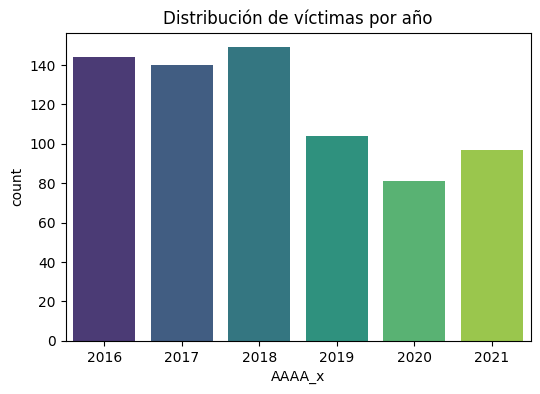

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='AAAA_x', data=df_siniestros, palette='viridis')
plt.title('Distribución de víctimas por año')
plt.show()

las vistimas por genero y por año

In [7]:
distribucion_sexo_anio = df_siniestros.groupby(['AAAA_x', 'SEXO']).size().reset_index(name='Cuenta')
print(distribucion_sexo_anio)


    AAAA_x  SEXO  Cuenta
0     2016     0      29
1     2016     1     115
2     2017     0      36
3     2017     1     104
4     2018     0      38
5     2018     1     111
6     2019     0      27
7     2019     1      77
8     2020     0      16
9     2020     1      65
10    2021     0      22
11    2021     1      75


<Figure size 600x400 with 0 Axes>

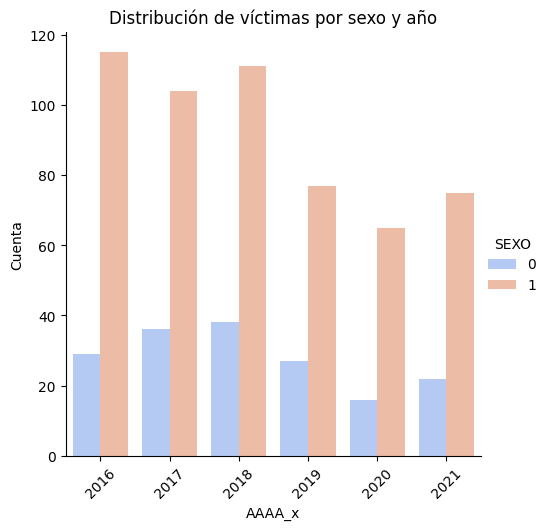

In [8]:
plt.figure(figsize=(6, 4))
sns.catplot(data=distribucion_sexo_anio, x='AAAA_x', y='Cuenta', hue='SEXO', kind='bar', palette='coolwarm')
plt.title('Distribución de víctimas por sexo y año')
plt.xticks(rotation=45)
plt.show()

Victimas a lo largo del timepo

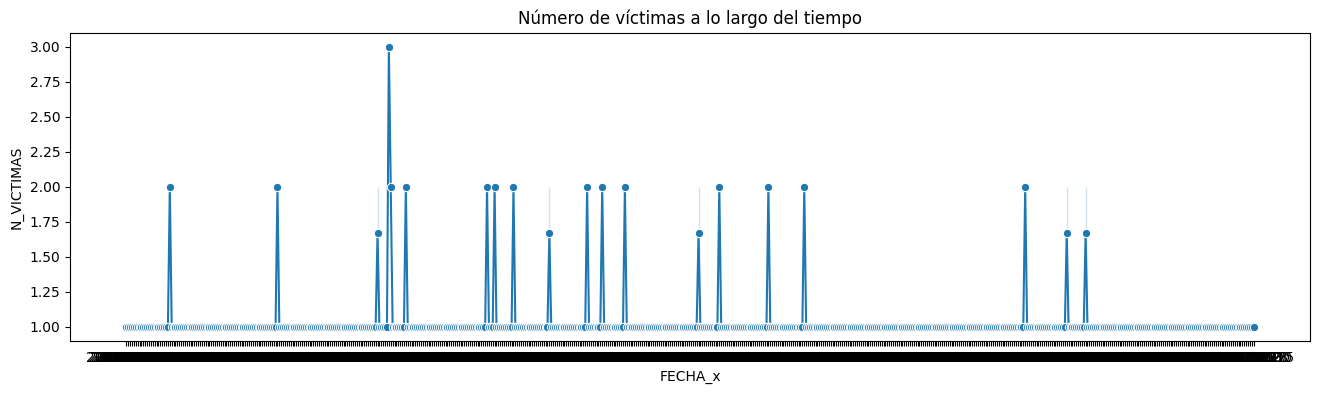

In [9]:
plt.figure(figsize=(16, 4))
sns.lineplot(x='FECHA_x', y='N_VICTIMAS', data=df_siniestros, marker='o')
plt.title('Número de víctimas a lo largo del tiempo')
plt.show()


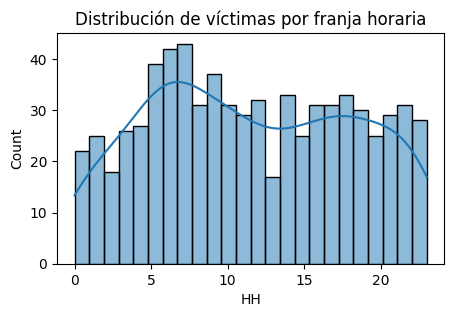

In [10]:
plt.figure(figsize=(5, 3))
sns.histplot(df_siniestros['HH'], bins=24, kde=True)
plt.title('Distribución de víctimas por franja horaria')
plt.show()


Ahora se hace un describe, para ver si los ouliers estan afectando la media

In [28]:
df_siniestros.describe()

,AAAA_x,MM_x,DD_x,SEXO,EDAD,N_VICTIMAS,HH,COMUNA
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,2018.180420,6.675524,15.942657,0.765035,42.155245,1.061538,11.565035,7.451748
std,1.671028,3.570954,8.685337,0.424274,19.068275,0.257363,6.685379,4.373508
min,2016.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,2017.000000,4.000000,9.000000,1.000000,28.000000,1.000000,6.000000,4.000000
50%,2018.000000,7.000000,16.000000,1.000000,39.000000,1.000000,11.000000,8.000000
75%,2019.000000,10.000000,23.000000,1.000000,55.000000,1.000000,17.000000,11.000000
max,2021.000000,12.000000,31.000000,1.000000,95.000000,3.000000,23.000000,15.000000


In [11]:
tabla1 = pd.pivot_table(
    df_siniestros,
    values='N_VICTIMAS',
    index='Grupo_Etario',
    columns='VICTIMA_x',
    aggfunc='sum',
    fill_value=0
)

In [31]:
tabla1

VICTIMA_x,AUTO,BICICLETA,CARGAS,MOTO,MOVIL,PASAJEROS,PEATON
Grupo_Etario,,,,,,,
Adolecente,3.0,1.0,0.0,6.0,0.0,0.0,6.0
Adulto,31.0,11.0,3.0,102.0,0.0,0.0,72.0
Adulto Mayor,20.0,5.0,1.0,18.0,1.0,1.0,60.0
Anciano,10.0,2.0,0.0,5.0,0.0,3.0,92.0
Joven Adulto,48.0,9.0,3.0,191.0,4.0,1.0,39.0
Niño,4.0,1.0,0.0,0.0,0.0,0.0,6.0


In [12]:
tabla2 = pd.pivot_table(
    df_siniestros,
    values='N_VICTIMAS',
    index='Grupo_Etario',
    columns='SEXO',
    aggfunc='sum',
    fill_value=0
)

In [33]:
tabla2

SEXO,0,1
Grupo_Etario,,
Adolecente,5.0,11.0
Adulto,38.0,181.0
Adulto Mayor,38.0,68.0
Anciano,46.0,66.0
Joven Adulto,47.0,248.0
Niño,1.0,10.0


Implementacion de la regresion espacial (Modelo de econometriz espacial)

In [37]:
import numpy as np
import pandas as pd
import geopandas as gpd
from libpysal.weights import Queen
from esda.moran import Moran
from spreg import ML_Lag


In [23]:
datos_modelo_espacial=df_siniestros[['latitud','longitud','N_VICTIMAS','SEXO', 'EDAD', 'HH','FECHA_x']]

In [26]:
datos_modelo_espacial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitud     715 non-null    object 
 1   longitud    715 non-null    object 
 2   N_VICTIMAS  715 non-null    float64
 3   SEXO        715 non-null    int64  
 4   EDAD        715 non-null    int64  
 5   HH          715 non-null    int64  
 6   FECHA_x     715 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 39.2+ KB


In [39]:
datos_modelo_espacial['latitud'] = pd.to_numeric(datos_modelo_espacial['latitud'], errors='coerce')
datos_modelo_espacial['longitud'] = pd.to_numeric(datos_modelo_espacial['longitud'], errors='coerce')

# Elimino filas con NA en latitud y longitud
datos_limpios = datos_modelo_espacial.dropna(subset=['latitud', 'longitud'])

In [40]:
datos_limpios.shape

(704, 7)

Se crea un GeoDataframe

In [41]:
gdf = gpd.GeoDataFrame(
    datos_limpios, 
    geometry=gpd.points_from_xy(datos_limpios.longitud, datos_limpios.latitud)
)

Creacion de matriz de pesos espaciales usando el metodo de la reina

In [42]:
w = Queen.from_dataframe(gdf)

C:\Users\57319\AppData\Local\Temp\ipykernel_12388\38079147.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)


Crear las matrices de diseño (X) y respuesta (y) y se corre la regresion.

In [43]:

X = gdf[['SEXO', 'EDAD', 'HH']]  # Sustituye con los nombres de tus columnas
y = gdf['N_VICTIMAS']  # Sustituye con el nombre de tu columna de víctimas

# Ajuste del modelo de regresión espacial
model = ML_Lag(y, X, w=w)
print(model.summary)

C:\Users\57319\AppData\Roaming\Python\Python312\site-packages\spreg\ml_lag.py:683: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :  N_VICTIMAS                Number of Observations:         704
Mean dependent var  :      1.0597                Number of Variables   :           5
S.D. dependent var  :      0.2544                Degrees of Freedom    :         699
Pseudo R-squared    :      0.0418
Spatial Pseudo R-squared:  0.0257
Log likelihood      :    -20.1886
Sigma-square ML     :      0.0619                Akaike info criterion :      50.377
S.E of regression   :      0.2488                Schwarz criterion     :      73.161

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

Resumen del Modelo

El modelo de regresión espacial ajustado mediante el método de máxima verosimilitud se centró en la variable dependiente N_VICTIMAS, con un total de 704 observaciones. El Log likelihood del modelo es -20.1886, un indicador de qué tan bien el modelo ajusta los datos. Una pseudo R-cuadrada espacial de 0.0257 sugiere que el modelo espacial captura cierta variabilidad en los datos, aunque no de manera sobresaliente. La varianza del sigma (sigma cuadrada) es de 0.0619, lo que indica que los errores del modelo son relativamente pequeños, lo que sugiere una buena precisión en las predicciones del modelo.

Coeficientes del Modelo

El término constante tiene un coeficiente de 1.03075, altamente significativo (p < 0.0001), lo que indica un impacto considerable en el número de víctimas. En contraste, la variable SEXO presenta un coeficiente de 0.00856, que no es estadísticamente significativo (p = 0.70594), sugiriendo que el género no tiene un impacto considerable en el número de víctimas. Por otro lado, la variable EDAD tiene un coeficiente negativo (-0.00068), lo que indica que a mayor edad, menor el número de víctimas, aunque esta relación no es significativa (p = 0.18070).

Impacto de la Franja Horaria

La variable HH (franja horaria) tiene un coeficiente de -0.00424, que es significativo (p = 0.00316). Esto sugiere que a medida que aumenta la franja horaria, el número de víctimas disminuye. Este hallazgo es importante para entender cómo las diferentes franjas horarias impactan la frecuencia de los accidentes de tránsito. El coeficiente espacial de la variable N_VICTIMAS (W_N_VICTIMAS) es 0.01340, también significativo (p < 0.0001), lo que indica que hay una fuerte correlación espacial en el número de víctimas; es decir, los accidentes de tránsito tienden a agruparse en ciertas áreas.

Interpretación de los Impactos Espaciales

Los impactos espaciales directos e indirectos muestran cómo las variables afectan tanto las ubicaciones específicas como sus vecinas. Por ejemplo, el impacto total de la variable SEXO es 0.0087, mientras que el de EDAD es -0.0007, y el de HH es -0.0043. Estos valores indican que, aunque SEXO y EDAD no tienen un impacto significativo individualmente, la franja horaria (HH) tiene un impacto negativo moderado en el número de víctimas. En resumen, el modelo resalta la importancia de considerar factores espaciales y temporales para entender y mitigar los accidentes de tránsito.



Ahora se muestran graficos del modelo.

MAPA DE RESIDUOS ESPACIALES

In [44]:
import matplotlib.pyplot as plt

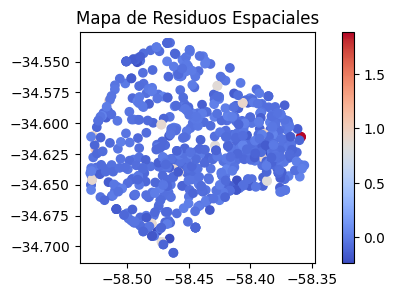

In [47]:
gdf['residuos'] = model.u
fig, ax = plt.subplots(1, 1, figsize=(7, 3))
gdf.plot(column='residuos', cmap='coolwarm', legend=True, ax=ax)
plt.title('Mapa de Residuos Espaciales')
plt.show()

El Mapa de Residuos Espaciales muestra la distribución geográfica de los residuos del modelo. Los colores representan la magnitud de los residuos.

GRAFICO DE MORAN'S

In [48]:
from esda.moran import Moran
from splot.esda import moran_scatterplot

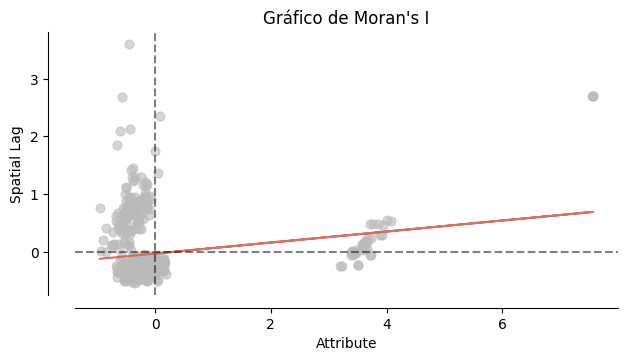

In [49]:
moran = Moran(gdf['residuos'], w)
moran_scatterplot(moran)
plt.title('Gráfico de Moran\'s I')
plt.show()


El Gráfico de Moran's I evalúa la autocorrelación espacial de los residuos. Un valor positivo significativo de Moran's I sugiere que los residuos están autocorrelacionados espacialmente, es decir, que las ubicaciones cercanas tienden a tener residuos similares. Esto es problemático porque indica que el modelo no ha capturado todos los efectos espaciales.

Eje X (Val. Normalizados de Residuos): Representa los residuos del modelo, normalizados a una escala estándar.

Eje Y (Valores Promedio de los Vecinos): Representa el promedio de los residuos de los vecinos de cada punto, lo cual muestra la relación espacial entre los residuos.

Pendiente de la línea de regresión (Moran's I): La pendiente de la línea de regresión en el gráfico es el valor de Moran's I.

Valor Positivo: Si la pendiente es positiva y significativa, sugiere que hay una autocorrelación espacial positiva, es decir, los residuos similares están agrupados.

Valor Negativo: Una pendiente negativa indicaría una autocorrelación espacial negativa, es decir, los residuos diferentes tienden a agruparse.

Cero o No Significativa: Indica una falta de autocorrelación espacial, lo cual es ideal, ya que sugiere que el modelo ha capturado bien los efectos espaciales.

GRAFICO DE COEFICIENTES

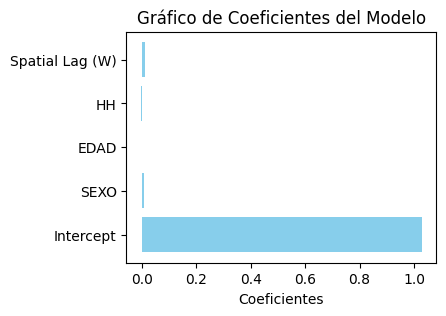

In [51]:
coeficientes = model.betas.flatten()
variables = ['Intercept', 'SEXO', 'EDAD', 'HH', 'Spatial Lag (W)']
fig, ax = plt.subplots(figsize=(4, 3))
ax.barh(variables, coeficientes, color='skyblue')
ax.set_xlabel('Coeficientes')
ax.set_title('Gráfico de Coeficientes del Modelo')
plt.show()